In [2]:
import xarray as xr
import dask
import numpy as np
import matplotlib.pyplot as plt

chunk_dict = {"time":50, "lat":100, "lon":300}

In [3]:
# ta = xr.open_dataset("/work/bb1153/b380883/TWP/TWP_3D_SAM_ta_20200130-20200228.nc").ta
ta = xr.open_dataset("/work/bb1153/b380883/GT/GT_TTL_SAM_ta_20200130-20200228.nc", chunks=chunk_dict).ta
ta

<xarray.DataArray 'ta' (time: 248, z: 9, lat: 1612, lon: 9216)>
dask.array<open_dataset-b4673fb025e05726d4203dcf00d4291dta, shape=(248, 9, 1612, 9216), dtype=float32, chunksize=(50, 9, 100, 300), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-30 ... 2020-02-29T21:00:00
  * lon      (lon) float32 0.0 0.03906 0.07812 0.1172 ... 359.9 359.9 360.0
  * lat      (lat) float32 -29.99 -29.96 -29.93 -29.89 ... 29.93 29.96 29.99
  * z        (z) float32 1.347e+04 1.397e+04 1.447e+04 ... 1.697e+04 1.747e+04
Attributes:
    standard_name:  air_temperature
    long_name:      Absolute Temperature                                     ...
    units:          K         
    cell_methods:   time: mean
    origin:         TABS

In [4]:
pa = xr.open_dataset("/work/bb1153/b380883/DYAMOND2_SAM_9216x4608x74_10s.nc").PRES.sel(z=ta.z)[0,:].values
time = ta.time
lat = ta.lat
lon = ta.lon
z = ta.z
pa

array([159.52457 , 147.29106 , 135.90334 , 125.309265, 115.467606,
       106.33794 ,  97.881355,  90.081955,  82.9104  ], dtype=float32)

In [5]:
pa = xr.DataArray(pa, dims=["z"], coords={"z":z}, attrs={"units":"mb"})

In [4]:
ta.close()

In [5]:
pa_latlon = xr.DataArray(pa, dims=["z"], coords={"z":z}, attrs={"units":"mb"}) * np.cos(np.deg2rad(lat))

In [6]:
pa_latlon = pa_latlon.expand_dims(dim={"time":len(time)}, 
                               axis=0).assign_coords({"time":time})

In [7]:
pa_latlon = pa_latlon.expand_dims(dim={"lon":len(lon)}, 
                               axis=2).assign_coords({"lon":lon})

In [8]:
pa_latlon

<xarray.DataArray (time: 248, z: 9, lon: 9216, lat: 1612)>
array([[[[138.16177 , 138.20885 , 138.25587 , ..., 138.25587 ,
          138.20885 , 138.16177 ],
         [138.16177 , 138.20885 , 138.25587 , ..., 138.25587 ,
          138.20885 , 138.16177 ],
         [138.16177 , 138.20885 , 138.25587 , ..., 138.25587 ,
          138.20885 , 138.16177 ],
         ...,
         [138.16177 , 138.20885 , 138.25587 , ..., 138.25587 ,
          138.20885 , 138.16177 ],
         [138.16177 , 138.20885 , 138.25587 , ..., 138.25587 ,
          138.20885 , 138.16177 ],
         [138.16177 , 138.20885 , 138.25587 , ..., 138.25587 ,
          138.20885 , 138.16177 ]],

        [[127.56653 , 127.609985, 127.65341 , ..., 127.65341 ,
          127.609985, 127.56653 ],
         [127.56653 , 127.609985, 127.65341 , ..., 127.65341 ,
          127.609985, 127.56653 ],
         [127.56653 , 127.609985, 127.65341 , ..., 127.65341 ,
          127.609985, 127.56653 ],
...
         [ 78.0186  ,  78.04517 ,  78.07174 , ...,  78.07174 ,
           78.04517 ,  78.0186  ],
         [ 78.0186  ,  78.04517 ,  78.07174 , ...,  78.07174 ,
           78.04517 ,  78.0186  ],
         [ 78.0186  ,  78.04517 ,  78.07174 , ...,  78.07174 ,
           78.04517 ,  78.0186  ]],

        [[ 71.80743 ,  71.83189 ,  71.85633 , ...,  71.85633 ,
           71.83189 ,  71.80743 ],
         [ 71.80743 ,  71.83189 ,  71.85633 , ...,  71.85633 ,
           71.83189 ,  71.80743 ],
         [ 71.80743 ,  71.83189 ,  71.85633 , ...,  71.85633 ,
           71.83189 ,  71.80743 ],
         ...,
         [ 71.80743 ,  71.83189 ,  71.85633 , ...,  71.85633 ,
           71.83189 ,  71.80743 ],
         [ 71.80743 ,  71.83189 ,  71.85633 , ...,  71.85633 ,
           71.83189 ,  71.80743 ],
         [ 71.80743 ,  71.83189 ,  71.85633 , ...,  71.85633 ,
           71.83189 ,  71.80743 ]]]], dtype=float32)
Coordinates:
  * z        (z) float32 1.347e+04 1.397e+04 1.447e+04 ... 1.697e+04 1.747e+04
  * lat      (lat) float32 -29.99 -29.96 -29.93 -29.89 ... 29.93 29.96 29.99
  * time     (time) datetime64[ns] 2020-01-30 ... 2020-02-29T21:00:00
  * lon      (lon) float32 0.0 0.03906 0.07812 0.1172 ... 359.9 359.9 360.0

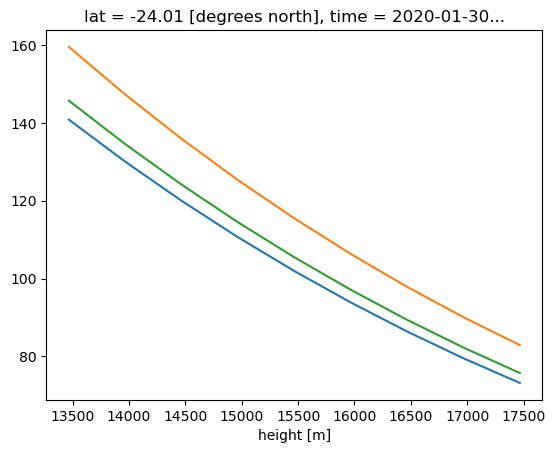

In [7]:
pa_latlon.sel(lat=28, method="nearest").sel(lon=144, method="nearest").isel(time=0).plot()
pa_latlon.sel(lat=0, method="nearest").sel(lon=147, method="nearest").isel(time=0).plot()
pa_latlon.sel(lat=-24, method="nearest").sel(lon=147, method="nearest").isel(time=0).plot()
plt.show()

In [9]:
# pa_latlon = (pa_latlon*100)
pa_latlon = pa_latlon.assign_attrs({"long_name":"atmospheric pressure","units":"mb"})
pa_latlon

<xarray.DataArray (time: 248, z: 9, lon: 9216, lat: 1612)>
array([[[[138.16177 , 138.20885 , 138.25587 , ..., 138.25587 ,
          138.20885 , 138.16177 ],
         [138.16177 , 138.20885 , 138.25587 , ..., 138.25587 ,
          138.20885 , 138.16177 ],
         [138.16177 , 138.20885 , 138.25587 , ..., 138.25587 ,
          138.20885 , 138.16177 ],
         ...,
         [138.16177 , 138.20885 , 138.25587 , ..., 138.25587 ,
          138.20885 , 138.16177 ],
         [138.16177 , 138.20885 , 138.25587 , ..., 138.25587 ,
          138.20885 , 138.16177 ],
         [138.16177 , 138.20885 , 138.25587 , ..., 138.25587 ,
          138.20885 , 138.16177 ]],

        [[127.56653 , 127.609985, 127.65341 , ..., 127.65341 ,
          127.609985, 127.56653 ],
         [127.56653 , 127.609985, 127.65341 , ..., 127.65341 ,
          127.609985, 127.56653 ],
         [127.56653 , 127.609985, 127.65341 , ..., 127.65341 ,
          127.609985, 127.56653 ],
...
         [ 78.0186  ,  78.04517 ,  78.07174 , ...,  78.07174 ,
           78.04517 ,  78.0186  ],
         [ 78.0186  ,  78.04517 ,  78.07174 , ...,  78.07174 ,
           78.04517 ,  78.0186  ],
         [ 78.0186  ,  78.04517 ,  78.07174 , ...,  78.07174 ,
           78.04517 ,  78.0186  ]],

        [[ 71.80743 ,  71.83189 ,  71.85633 , ...,  71.85633 ,
           71.83189 ,  71.80743 ],
         [ 71.80743 ,  71.83189 ,  71.85633 , ...,  71.85633 ,
           71.83189 ,  71.80743 ],
         [ 71.80743 ,  71.83189 ,  71.85633 , ...,  71.85633 ,
           71.83189 ,  71.80743 ],
         ...,
         [ 71.80743 ,  71.83189 ,  71.85633 , ...,  71.85633 ,
           71.83189 ,  71.80743 ],
         [ 71.80743 ,  71.83189 ,  71.85633 , ...,  71.85633 ,
           71.83189 ,  71.80743 ],
         [ 71.80743 ,  71.83189 ,  71.85633 , ...,  71.85633 ,
           71.83189 ,  71.80743 ]]]], dtype=float32)
Coordinates:
  * z        (z) float32 1.347e+04 1.397e+04 1.447e+04 ... 1.697e+04 1.747e+04
  * lat      (lat) float32 -29.99 -29.96 -29.93 -29.89 ... 29.93 29.96 29.99
  * time     (time) datetime64[ns] 2020-01-30 ... 2020-02-29T21:00:00
  * lon      (lon) float32 0.0 0.03906 0.07812 0.1172 ... 359.9 359.9 360.0
Attributes:
    long_name:  atmospheric pressure
    units:      mb

In [1]:
pa_latlon = xr.Dataset({"pa":pa_latlon}, attrs={"long_name":"atmospheric pressure","units":"Pa"}).chunk(chunk_dict)
pa_latlon

NameError: name 'xr' is not defined

In [ ]:
pa_latlon.to_netcdf("/work/bb1153/b380883/GT/GT_TTL_SAM_pa_20200130-20200228.nc")